# Project Part 3
# Team 4
# Garland Lau, Reed Bevins, Ryan Thomas
# Auction Verification

Data cleaning. Seperate results, into true, false, and all. Remove outliers with long runtimes.

C:\Users\garla\first-node\ML\project\data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


C:\Users\Reed\AppData\Local\Temp\ipykernel_10796\2026211787.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ver_true['num_ver_time'] = pd.to_numeric(ver_true['verification.time'])
C:\Users\Reed\AppData\Local\Temp\ipykernel_10796\2026211787.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ver_false['num_ver_time'] = pd.to_numeric(ver_false['verification.time'])


Text(0.5, 1.0, 'False Verification Runtime Summary')

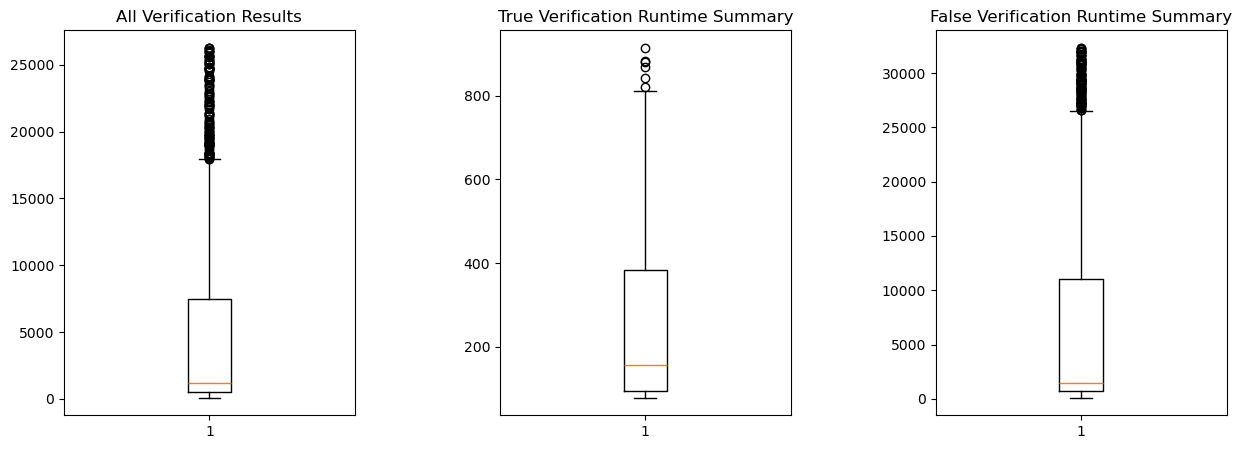

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
#########################################################

file_path = r'C:\Users\garla\first-node\ML\project\data.csv'
print(file_path)
#os.chdir(r'C:\Users\garla\first-node\ML\project')

#auction = pd.read_csv(file_path)
auction = pd.read_csv('data.csv')
auction.info()

# All verification results
ver_all = auction[auction["verification.result"].isin([True, False])]

# True verification results
ver_true = auction[auction["verification.result"] == True]

# False verification results
ver_false = auction[auction["verification.result"] == False]

# data cleaning of All verification time
ver_all['num_ver_time'] = pd.to_numeric(ver_all['verification.time'])
all_75th = ver_all['num_ver_time'].quantile(0.75)
all_25th = ver_all['num_ver_time'].quantile(0.25)
all_IQR = all_75th - all_25th
all_upper = all_75th + (1.5 * all_IQR)
all_lower = all_25th - (1.5 * all_IQR)
ver_all = ver_all[(ver_all['num_ver_time'] >= all_lower) & (ver_all['num_ver_time'] <= all_upper)]
# print(ver_all.info())

# data cleaning of True verification time
ver_true['num_ver_time'] = pd.to_numeric(ver_true['verification.time'])
true_75th = ver_true['num_ver_time'].quantile(0.75)
true_25th = ver_true['num_ver_time'].quantile(0.25)
true_IQR = true_75th - true_25th
true_upper = true_75th + (1.5 * true_IQR)
true_lower = true_25th - (1.5 * true_IQR)
ver_true = ver_true[(ver_true['num_ver_time'] >= true_lower) & (ver_true['num_ver_time'] <= true_upper)]
# print(ver_true.info())

# data cleaning of False verification time
ver_false['num_ver_time'] = pd.to_numeric(ver_false['verification.time'])
false_75th = ver_false['num_ver_time'].quantile(0.75)
false_25th = ver_false['num_ver_time'].quantile(0.25)
false_IQR = false_75th - false_25th
false_upper = false_75th + (1.5 * false_IQR)
false_lower = false_25th - (1.5 * false_IQR)
ver_false = ver_false[(ver_false['num_ver_time'] >= false_lower) & (ver_false['num_ver_time'] <= false_upper)]
# print(ver_false.info())

fig, plt_table = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

plt_table[0].boxplot(ver_all['verification.time'])
plt_table[0].set_title('All Verification Results')
plt_table[1].boxplot(ver_true['verification.time'])
plt_table[1].set_title('True Verification Runtime Summary')
plt_table[2].boxplot(ver_false['verification.time'])
plt_table[2].set_title('False Verification Runtime Summary')








All Verification Runtimes with Regression for:
- Price
- Product Number
- Winner Number

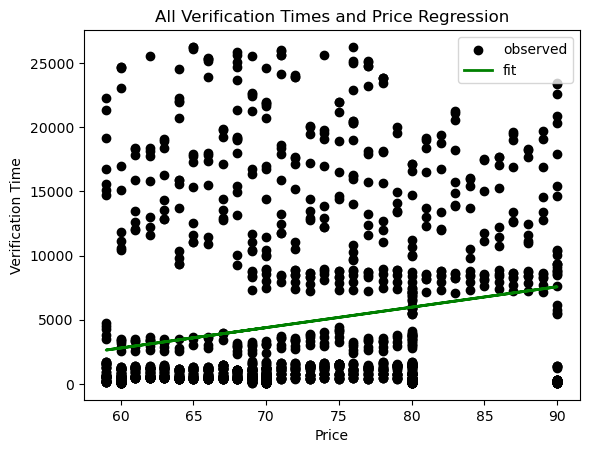

R2 Score:  0.03798456710590159


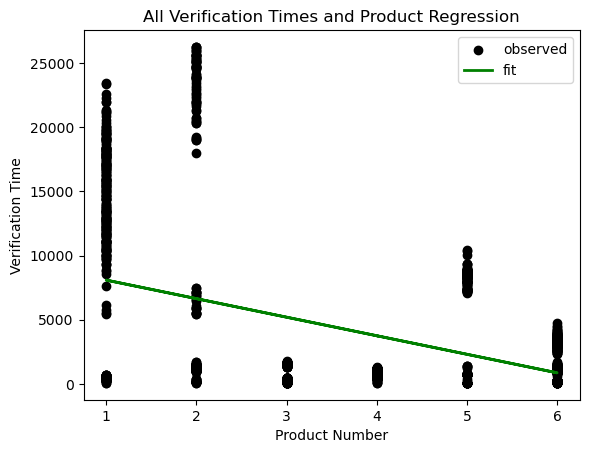

R2 Score:  0.16279334933131429


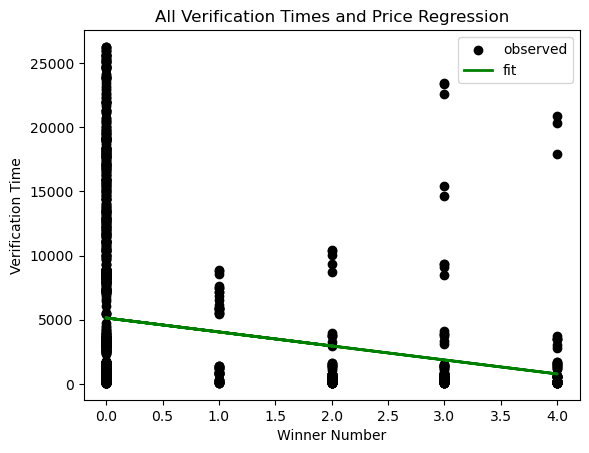

R2 Score:  0.030489987460350365


In [16]:
# All verification results
train_df, test_df = train_test_split(ver_all,shuffle = True, test_size = 0.15, random_state=17)

# Price Number
X = train_df['property.price']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('All Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Product Number
X = train_df['property.product']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Product Number')
plt.ylabel('Verification Time')
plt.title('All Verification Times and Product Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Winner Number
X = train_df['property.winner']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Winner Number')
plt.ylabel('Verification Time')
plt.title('All Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)


True Verification Runtimes with Regression for:
- Price
- Product Number
- Winner Number

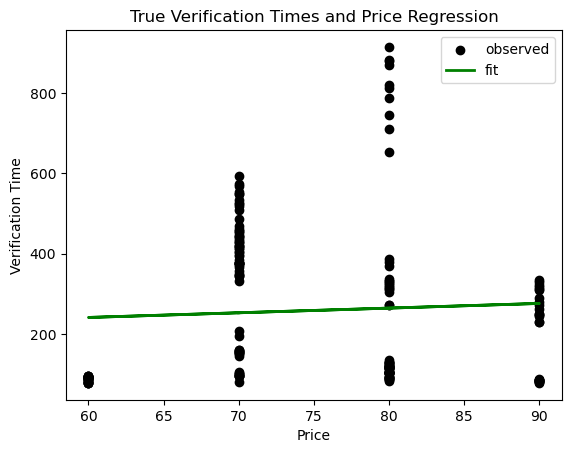

R2 Score:  0.002851989716066039


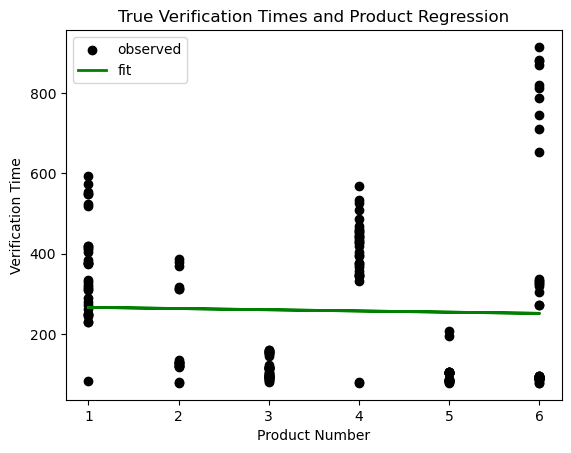

R2 Score:  0.0007080211588266216


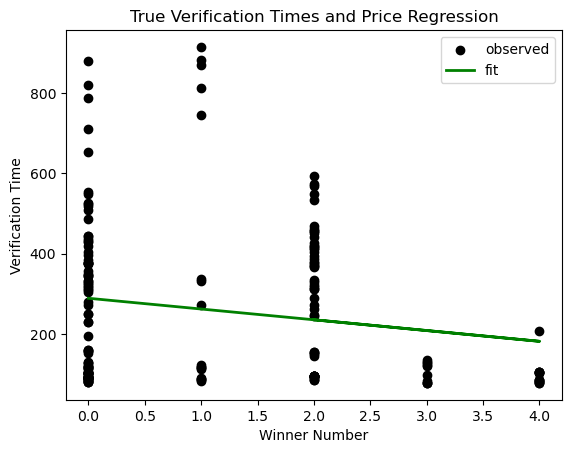

R2 Score:  0.030999746195698452


In [17]:
# true verification results
train_df, test_df = train_test_split(ver_true,shuffle = True, test_size = 0.15, random_state=17)

# Price Number
X = train_df['property.price']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('True Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Product Number
X = train_df['property.product']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Product Number')
plt.ylabel('Verification Time')
plt.title('True Verification Times and Product Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Winner Number
X = train_df['property.winner']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Winner Number')
plt.ylabel('Verification Time')
plt.title('True Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)



False Verification Runtimes with Regression for:
- Price
- Product Number
- Winner Number

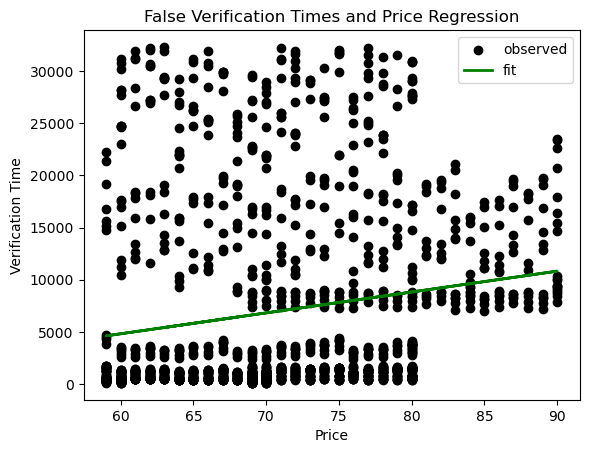

R2 Score:  0.028253310720267377


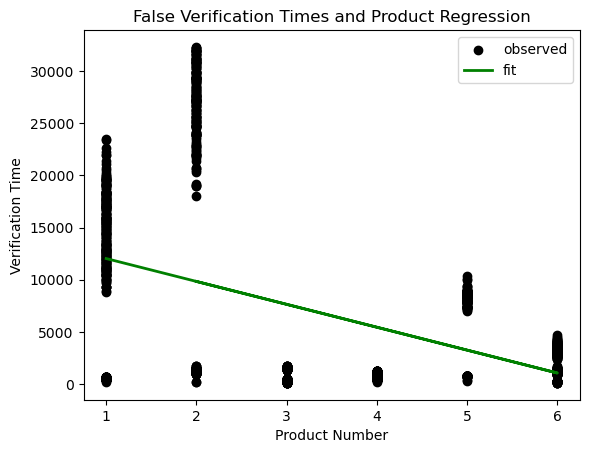

R2 Score:  0.19307335435092687


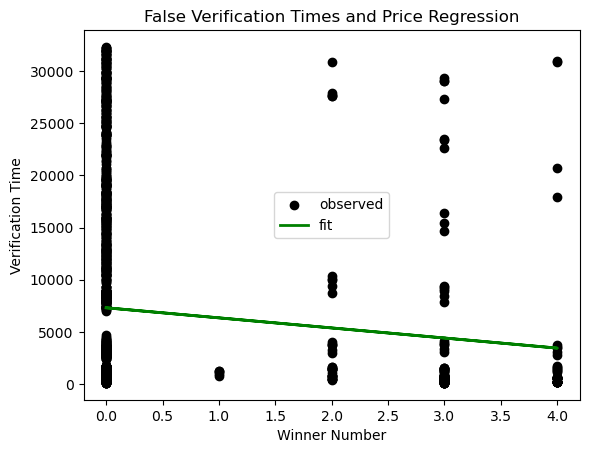

R2 Score:  0.010511643146645544


In [18]:
# false verification results
train_df, test_df = train_test_split(ver_false,shuffle = True, test_size = 0.15, random_state=17)

# Price Number
X = train_df['property.price']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Price')
plt.ylabel('Verification Time')
plt.title('False Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Product Number
X = train_df['property.product']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)

plt.scatter(X, y, color='black', label='observed')
plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Product Number')
plt.ylabel('Verification Time')
plt.title('False Verification Times and Product Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)

# Winner Number
X = train_df['property.winner']
y = train_df['num_ver_time']
X = np.array(X).reshape(-1,1) 
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
r_sq = model.score(X, y)
plt.scatter(X, y, color='black', label='observed')

plt.plot(X, model.predict(X), label='fit', color='Green', linewidth=2)
plt.xlabel('Winner Number')
plt.ylabel('Verification Time')
plt.title('False Verification Times and Price Regression')
plt.legend(loc='best')
plt.show()
print('R2 Score: ', r_sq)
